<!--<badge>--><a href="https://colab.research.google.com/github/softmatterlab/DeepTrack-2.0/blob/develop/examples/paper-examples/1-MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In [1]:
%matplotlib inline

!pip install deeptrack

# Example 1. MNIST

Trains a fully connected neural network to identify handwritten digits using MNIST dataset.

## 1. Setup

We can download the images to your disk using the Python package \texttt{deeptrack}:

In [2]:

from deeptrack.extras import datasets
datasets.load("MNIST")


c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Dataset already downloaded.


Then, we can load the training data using \texttt{numpy}

In [3]:
from numpy import load

training_data = load("./datasets/MNIST/training_set.npy")
training_ground_truths = load("./datasets/MNIST/training_labels.npy")

print("Training data:", training_data.shape)
print("Ground truths:", training_ground_truths.shape)

Training data: (60000, 28, 28)
Ground truths: (60000,)


In [4]:
flattened_training_data = training_data.reshape((-1, 28*28))
print("Flattened training data:", flattened_training_data.shape)

Flattened training data: (60000, 784)


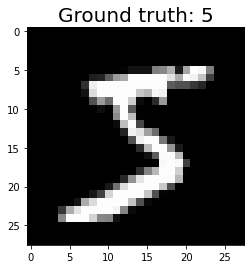

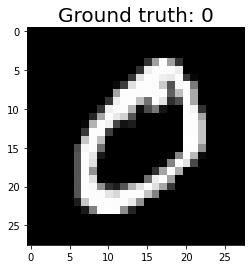

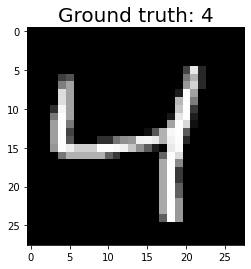

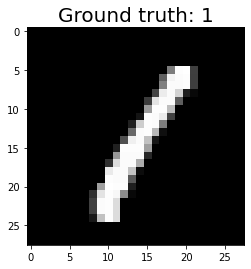

In [5]:
import matplotlib.pyplot as plt 

for i in range(4):
    plt.title(f"Ground truth: {training_ground_truths[i]}", fontsize=20)
    plt.imshow(training_data[i], cmap="gray")
    plt.show()

Note that the labels are given as digits. For the training, we want them in what is known as \emph{one-hot encoding}, which is each possible class is represented by a single binary choice in a vector. In this case, we want a vector of length $10$ for the $10$ possible digits, with the first element representing the digit $0$, the second element the digit $1$, and so forth. The element representing the digit of the corresponding image will be given the value $1$, and the rest $0$.

In [6]:
from numpy import zeros, argmax

def digits_to_one_hot(digits):
    one_hot_ground_truths = zeros((digits.shape[0], 10))
    for idx, digit in enumerate(digits):
        one_hot_ground_truths[idx, digit] = 1
    return one_hot_ground_truths

# To convert the ground_truths back to digits, we define the following function:
def one_hot_to_digit(one_hot_ground_truths):
    return argmax(one_hot_ground_truths, axis=-1)


In [7]:
# We can check that everything works as expected by converting the one-hot encoded ground_truths back to digits:

one_hot_training_ground_truths = digits_to_one_hot(training_ground_truths)
restored_training_ground_truths = one_hot_to_digit(one_hot_training_ground_truths)

all_equal = (restored_training_ground_truths == training_ground_truths).all()

print("All equal:", all_equal)

All equal: True


In [8]:
def accuracy(prediction, ground_truths):
    from numpy import sum

    predicted_digits = one_hot_to_digit(prediction)
    gt_digits = one_hot_to_digit(ground_truths)

    correct = sum(predicted_digits == gt_digits)
    total = prediction.shape[0]

    return correct / total



In [9]:
validation_data = load("./datasets/MNIST/validation_set.npy")
validation_ground_truths = load("./datasets/MNIST/validation_labels.npy")

flattened_validation_data = validation_data.reshape((-1, 28*28))
one_hot_validation_ground_truths = digits_to_one_hot(validation_ground_truths)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650   

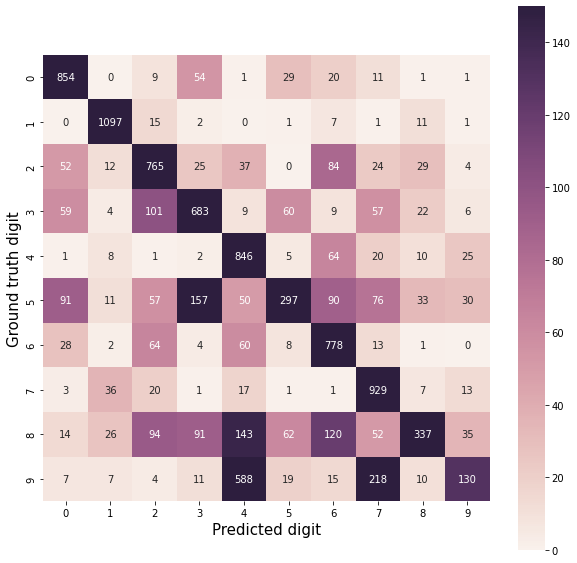

In [10]:
# Let us define the weights of the network using numpy
from deeptrack.models import FullyConnected
from deeptrack.layers import DenseBlock

model = FullyConnected(
    input_shape=(28*28,),
    dense_layers_dimensions=(64, 64),
    number_of_outputs=10,
    output_activation="sigmoid",
    dense_block=DenseBlock(activation="sigmoid")
)
model.summary()

from tensorflow.keras.optimizers import RMSprop, SGD, Adam
model.compile(
    loss="mse",
    optimizer=SGD(learning_rate=0.1),
)


h = model.fit(
    flattened_training_data,
    one_hot_training_ground_truths,
    epochs=1,
    batch_size=1
)

# Let us now evaluate the model on the validation set:
predicted_y = model.predict(flattened_validation_data)
computed_accuracy = accuracy(predicted_y, one_hot_validation_ground_truths)
print("Accuracy:", computed_accuracy)

# create a confusion matrix using numpy
from numpy import zeros
from seaborn import heatmap, cubehelix_palette
import matplotlib.pyplot as plt

confusion_matrix = zeros((10, 10))

predicted_digits = one_hot_to_digit(predicted_y)
gt_digits = one_hot_to_digit(one_hot_validation_ground_truths)

for predicted, gt in zip(predicted_digits, gt_digits):
    confusion_matrix[gt, predicted] += 1

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
heatmap(
    confusion_matrix,
    annot=True,
    fmt=".0f",
    square=True,
    cmap=cubehelix_palette(light=0.95, as_cmap=True),
    xticklabels=range(10),
    yticklabels=range(10),
    vmax=150,
)
plt.xlabel("Predicted digit", fontsize=15)
plt.ylabel("Ground truth digit", fontsize=15)
plt.savefig("figures/lecture_1_b/confusion_matrix_0.png", dpi=300)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650 

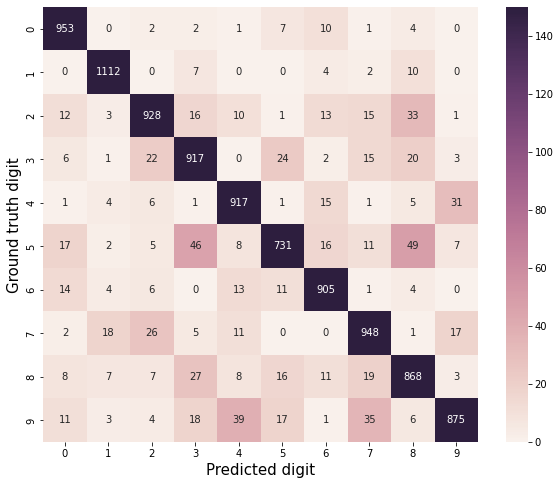

In [25]:
# Let us define the weights of the network using numpy
from deeptrack.models import FullyConnected
from deeptrack.layers import DenseBlock

model = FullyConnected(
    input_shape=(28*28,),
    dense_layers_dimensions=(64, 64),
    number_of_outputs=10,
    output_activation="sigmoid",
    dense_block=DenseBlock(activation="sigmoid")
)
model.summary()

from tensorflow.keras.optimizers import RMSprop, SGD, Adam
model.compile(
    loss="mse",
    optimizer=SGD(learning_rate=0.1),
)


h = model.fit(
    flattened_training_data,
    one_hot_training_ground_truths,
    epochs=10,
    batch_size=32
)

# Let us now evaluate the model on the validation set:
predicted_y = model.predict(flattened_validation_data)
computed_accuracy = accuracy(predicted_y, one_hot_validation_ground_truths)
print("Accuracy:", computed_accuracy)

# create a confusion matrix using numpy
from numpy import zeros
from seaborn import heatmap, cubehelix_palette
import matplotlib.pyplot as plt

confusion_matrix = zeros((10, 10))

predicted_digits = one_hot_to_digit(predicted_y)
gt_digits = one_hot_to_digit(one_hot_validation_ground_truths)

for predicted, gt in zip(predicted_digits, gt_digits):
    confusion_matrix[gt, predicted] += 1

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
heatmap(
    confusion_matrix,
    annot=True,
    fmt=".0f",
    square=True,
    cmap=cubehelix_palette(light=0.95, as_cmap=True),
    vmax=150,
)
plt.xlabel("Predicted digit", fontsize=15)
plt.ylabel("Ground truth digit", fontsize=15)
plt.savefig("figures/lecture_1_b/confusion_matrix_1.png", dpi=600)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650 

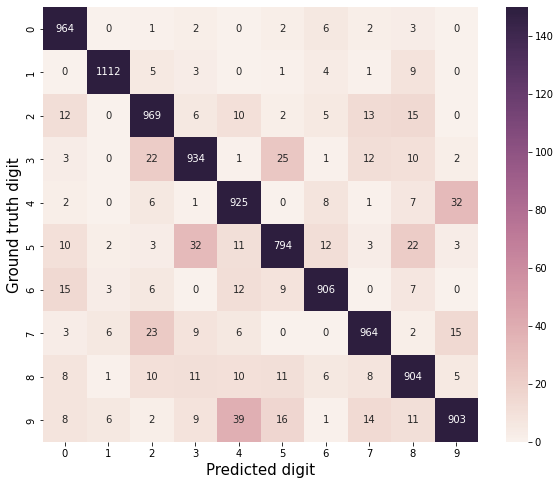

In [26]:
# Let us define the weights of the network using numpy
from deeptrack.models import FullyConnected
from deeptrack.layers import DenseBlock

model = FullyConnected(
    input_shape=(28*28,),
    dense_layers_dimensions=(64, 64),
    number_of_outputs=10,
    output_activation="sigmoid",
    dense_block=DenseBlock(activation="sigmoid")
)
model.summary()

from tensorflow.keras.optimizers import RMSprop, SGD, Adam
model.compile(
    loss="mse",
    optimizer=RMSprop(learning_rate=0.001),
)


h = model.fit(
    flattened_training_data,
    one_hot_training_ground_truths,
    epochs=10,
    batch_size=32
)

# Let us now evaluate the model on the validation set:
predicted_y = model.predict(flattened_validation_data)
computed_accuracy = accuracy(predicted_y, one_hot_validation_ground_truths)
print("Accuracy:", computed_accuracy)

# create a confusion matrix using numpy
from numpy import zeros
from seaborn import heatmap, cubehelix_palette
import matplotlib.pyplot as plt

confusion_matrix = zeros((10, 10))

predicted_digits = one_hot_to_digit(predicted_y)
gt_digits = one_hot_to_digit(one_hot_validation_ground_truths)

for predicted, gt in zip(predicted_digits, gt_digits):
    confusion_matrix[gt, predicted] += 1

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
heatmap(
    confusion_matrix,
    annot=True,
    fmt=".0f",
    square=True,
    cmap=cubehelix_palette(light=0.95, as_cmap=True),
    vmax=150,
)
plt.xlabel("Predicted digit", fontsize=15)
plt.ylabel("Ground truth digit", fontsize=15)
plt.savefig("figures/lecture_1_b/confusion_matrix_2.png", dpi=600)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650 

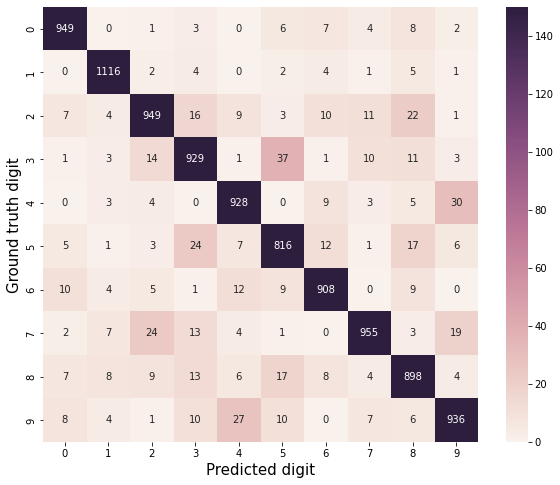

In [27]:
# Let us define the weights of the network using numpy
from deeptrack.models import FullyConnected
from deeptrack.layers import DenseBlock

model = FullyConnected(
    input_shape=(28*28,),
    dense_layers_dimensions=(64, 64),
    number_of_outputs=10,
    output_activation="softmax",
    dense_block=DenseBlock(activation="sigmoid")
)
model.summary()

from tensorflow.keras.optimizers import RMSprop, SGD, Adam
model.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=0.001),
)


h = model.fit(
    flattened_training_data,
    one_hot_training_ground_truths,
    epochs=10,
    batch_size=32
)

# Let us now evaluate the model on the validation set:
predicted_y = model.predict(flattened_validation_data)
computed_accuracy = accuracy(predicted_y, one_hot_validation_ground_truths)
print("Accuracy:", computed_accuracy)

# create a confusion matrix using numpy
from numpy import zeros
from seaborn import heatmap, cubehelix_palette
import matplotlib.pyplot as plt

confusion_matrix = zeros((10, 10))

predicted_digits = one_hot_to_digit(predicted_y)
gt_digits = one_hot_to_digit(one_hot_validation_ground_truths)

for predicted, gt in zip(predicted_digits, gt_digits):
    confusion_matrix[gt, predicted] += 1

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
heatmap(
    confusion_matrix,
    annot=True,
    fmt=".0f",
    square=True,
    cmap=cubehelix_palette(light=0.95, as_cmap=True),
    vmax=150,
)
plt.xlabel("Predicted digit", fontsize=15)
plt.ylabel("Ground truth digit", fontsize=15)
plt.savefig("figures/lecture_1_b/confusion_matrix_3.png", dpi=600)

### 5.2 Visualizing errors

We show a few images which the model predicted incorrectly.

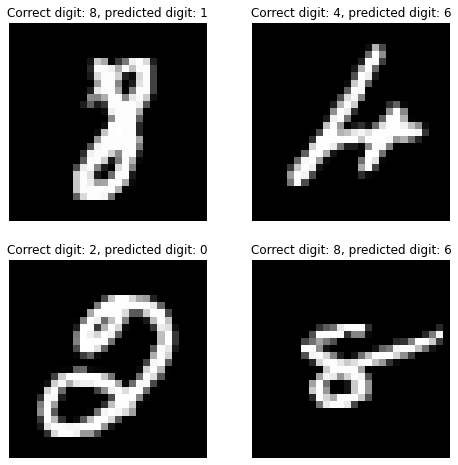

In [48]:
from random import choices

model_is_wrong = predicted_digits != gt_digits
array_of_hard_images = validation_data[model_is_wrong]
array_of_hard_labels = gt_digits[model_is_wrong]
inaccurately_predicted_digits = predicted_digits[model_is_wrong]

loop_iterator = list(zip(array_of_hard_images, array_of_hard_labels, inaccurately_predicted_digits))

plt.figure(figsize=(8, 8))
for idx, (image, correct_digit, predicted_digit) in enumerate(choices(loop_iterator, k=4)):

    plt.subplot(2, 2, idx + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Correct digit: {correct_digit}, predicted digit: {predicted_digit}")
    plt.axis("off")
plt.savefig(f"figures/lecture_1_b/hard_images.png", dpi=300)
